<a href="https://colab.research.google.com/github/Tianyao-star/picture/blob/main/ComputationalImagingHomework1_TZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computational Imaging
### David J. Brady
### University of Arizona

### Homework 1


Thank you for taking OPTI 556 Computational imaging. The course makes extensive use of jupyter notebooks and python due to the fact that these resources are freely available and they are tightly integrated with data science and deep learining tools. You are required to submit your homework inthe form of interactive python notebooks executable in the Google colab interface. Any libraries that you use should be available online or submitted with your work, we need to be able to run and test your code.

As seen in this paragraph, ipynb have a cellular structure with multilayers, table of contents and, especially important, text cells. Homework for this course is expansive, not reductive. You should think of the assignment as a jazz riff on which you need to improvise. Try many things, explore the data and write about what you see. Be as descriptive as possible, write every observation down.

Notebooks use their own markdown languages for
###titles and subtitles


1.   lists
2.   of lists

They also can incorporate links and code. Of particular importance, they support use of Latex for equations, so you can write things like: Even though
$$
g(y)=\int h(x,y)f(x) dx
$$
is a continuous transformation if we are clever we can express it discretely as
$$
\mathbf{g}=\mathbf{Hf}
$$
If you are not familiar with Latex you may wish to become more familiar. Similarly, you may wish to take advantage of online tutorials regarding python, numpy, scipy, keras, pytorch, tensorflow and other useful tools.



Your assignment for this week is to create notebook combining the various notebooks used to create figures in chapter 2 of our text. Figure 2.4 shows fourier series estimation of a signal. Repeat this analysis for 4 different signals of your own choosing. What effects do you see? Do you see Gibbs phenomena?

Table 2.1 discusses the relationship between the discrete Fourier tranform and continous signals. Try taking the DFT for various signals with various sampling periods, as shown in figures 2.10 and 2.11. Interpolate your signals using Shannon interpolation. What if you interpolate with linear or cubic spline interpolators instead?

Look at and analyze the discrete wavelet tranformation for various images drawn from your phone, as in figures 2.16 and 2.17. Learn how to manipulate images in python. Try rotating by 35 degrees. How does rotation affect the wavelet transform? Try comparing the wavelet transform for different color planes of an RGB image.

Try varying the sample parameters (pixel pitch and pixel width) for various signals as in figures 2.18 through 2.21. Discuss the impact of aliasing and low pass filtering on your signals.

Finally, figures 2.22 through 2.28 consider the singular value spectra for various forward models. Try to replicate these figures for similar, different, values of $\mathbf{H}$. Explain what you see in the figures.

Good luck and have fun!


## Libraries

In [ ]:
#%matplotlib inline
#import numpy as np
#import matplotlib.pyplot as plt
#from scipy.signal import convolve2d, convolve
#from skimage import color, data, restoration, exposure
#from skimage import io
#from google.colab import files
#plt.rcParams['figure.figsize'] = [20, 10]
#plt.rcParams.update({'font.size': 16})



from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display, clear_output
import ipywidgets as widgets
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.integrate as integrate
%matplotlib inline

'''
   Since I rarely use Python, so I need to understand the syntax of python.
   Above are the codes used to import functions from library in python.
   1. For example, 'from' & 'import' means that we import a specific function from the library. Like after writing 'from math import sqrt', we can just directly use 'sqrt'
   instead of 'math.sqrt'
'''

"\n   Since I rarely use Python, so I need to understand the syntax of python.\n   Above are the codes used to import functions from library in python.\n   1. For example, 'from' & 'import' means that we import a specific function from the library. Like after writing 'from math import sqrt', we can just directly use 'sqrt'\n   instead of 'math.sqrt'\n"

##Problem 1.

##Here, I use 4 different signals (functions) to repeat the Fourier representation shown in figure 2.4

##Basically, I will plot them first and then use the same approach as the provided code to perform the Fourier representation with different amounts of Fourier terms.

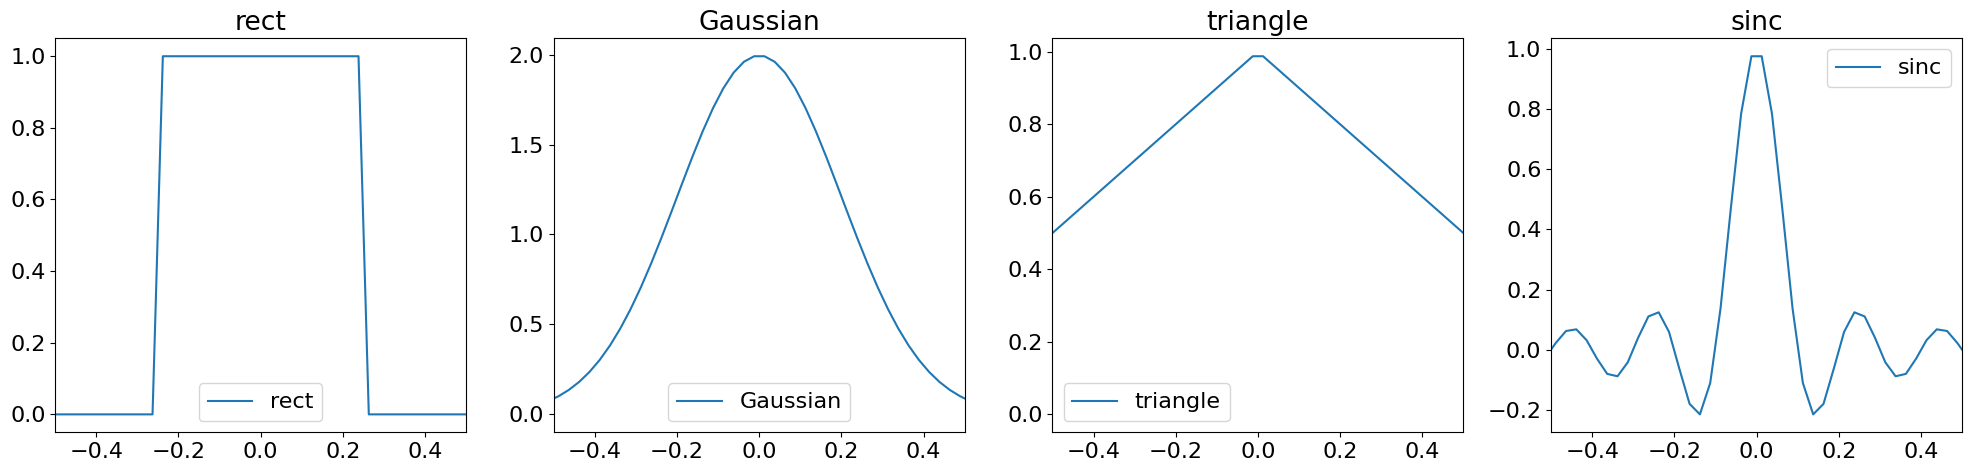

In [ ]:
from numpy.lib.function_base import vectorize
# define the 1st function as rect function
def f1(x):
    if abs(x) < 0.25:
        return 1
    else:
        return 0

# define the 2nd function as Gaussian distribution
def f2(x):
    coefficient = 1 / (0.2*(np.sqrt(2 * np.pi)))
    exponent = np.exp(-0.5 * (x/.2)**2)
    return coefficient * exponent

# define the 3rd function as triangle function
def f3(x):
    if abs(x) < 1:
        return 1 - abs(x)
    else:
        return 0

# define the 4th function as sinc function
def f4(x):
    return np.sinc(10*x)

vf1 = vectorize(f1)
vf2 = vectorize(f2)
vf3 = vectorize(f3)
vf4 = vectorize(f4)

# Create an array of x values to evaluate the functions:
x = np.linspace(-5, 5, 400)

# List of functions and their names
functions = [f1, f2, f3, f4]
vf_functions = [vf1, vf2, vf3, vf4]    #vectorize the functions
names = ["rect", "Gaussian", "triangle", "sinc"]

plt.figure(figsize=(20, 5))  # Adjusted figure size for a 1x4 layout

# Looping through each function by index
for i in range(len(vf_functions)):     # 'len' is to get the length of list, while 'range' provides the sequence of numbers until len(functions)
    func = vf_functions[i]
    y = [func(xi) for xi in x]      # apply the function (func) to each value in x to produce a corresponding list of y values.
    plt.subplot(1, 4, i+1)          # 1x4 grid of subplots
    plt.plot(x, y, label=names[i])
    plt.title(names[i])
    plt.legend()
    plt.xlim(-.5, 0.5)
plt.tight_layout()
plt.show()


<ipython-input-67-8e12033b6e5e>:22: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, pt)


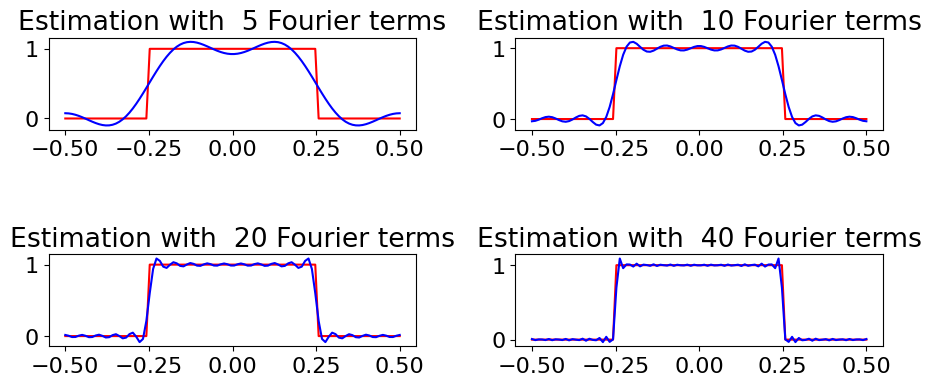

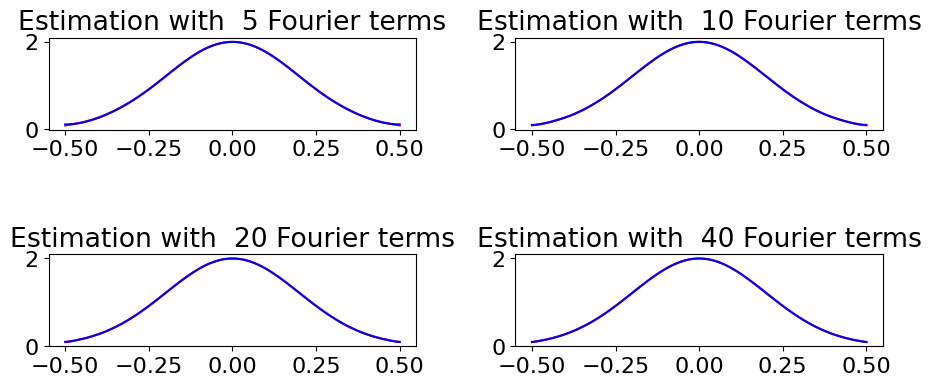

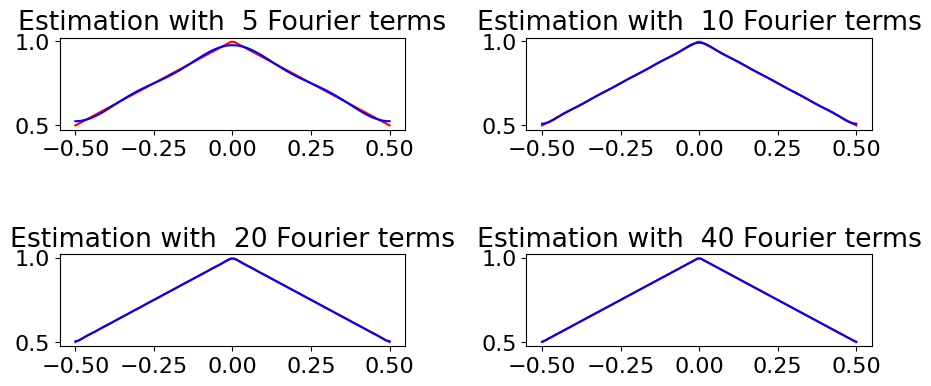

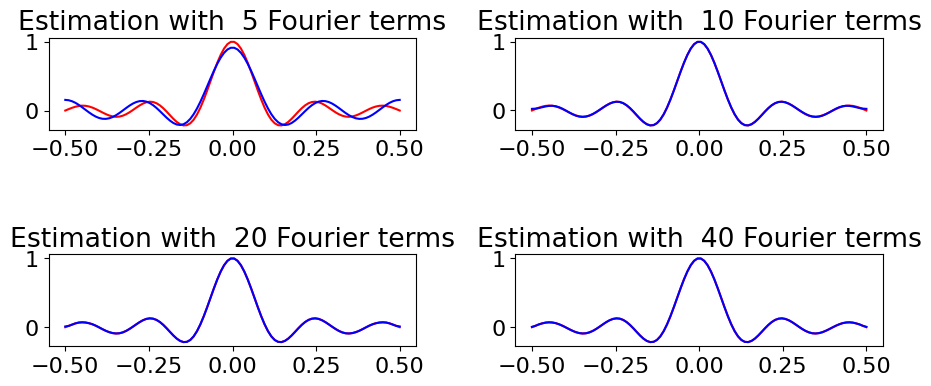

In [ ]:
vf_functions = [vf1, vf2, vf3, vf4]    #vectorize the functions

#for row, vf in enumerate(vf_functions):
for row in range(len(vf_functions)):
    vf = vf_functions[row]
    pt=0;
    plt.subplots(figsize=(10,5))
    xrange=np.linspace(-.5,.5,100);
    for coeffs in [5, 10, 20, 40]:
      pt=pt+1
      sv=np.zeros(coeffs)
      cv=np.zeros(coeffs)
      for pop in np.arange(coeffs):
        sv[pop]=2*integrate.quad(lambda x: vf(x)*np.sin(2*np.pi*pop*x), -.5, .5)[0]
        cv[pop]=2*integrate.quad(lambda x: vf(x)*np.cos(2*np.pi*pop*x), -.5, .5)[0]
        cv[0]=cv[0]
        def px(x,sv,cv):
          pxx=0;
          for pop in np.arange(len(sv)):
            pxx=pxx+sv[pop]*np.sin(2*np.pi*pop*x)+cv[pop]*np.cos(2*np.pi*pop*x)
          return pxx
      plt.subplot(2, 2, pt)
      plt.plot(xrange,vf(xrange),'r',xrange,px(xrange,sv,cv)-cv[0]/2.,'b')
      #plt.ylim(-.5, 1.5)
      plt.title("Estimation with  %i Fourier terms" %(pop+1))
      plt.tight_layout(pad=3)

##From the figure above, I find that when the sharp edge occurs, it usually need more Fourier terms to represent the original signals, however, it is quite easy to represent curves with less number of Fourier terms. Also, the Gibbs phenomena can be observed from the 1st rect function where at the abrupt edge, the Fourier representation plots oscillate fast, this is due to that high frequency compoenets of a signal needs more accurate representation.



## For problem 2, here by using provided code, we can generate different singals with various sampling periods. Also, we can try different interpolation methods including Shannon interpolation, linear and cubic spline.

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, InterpolatedUnivariateSpline
from scipy import integrate

<ipython-input-38-aa3150b6037b>:27: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  N=np.int(2*X/delta)


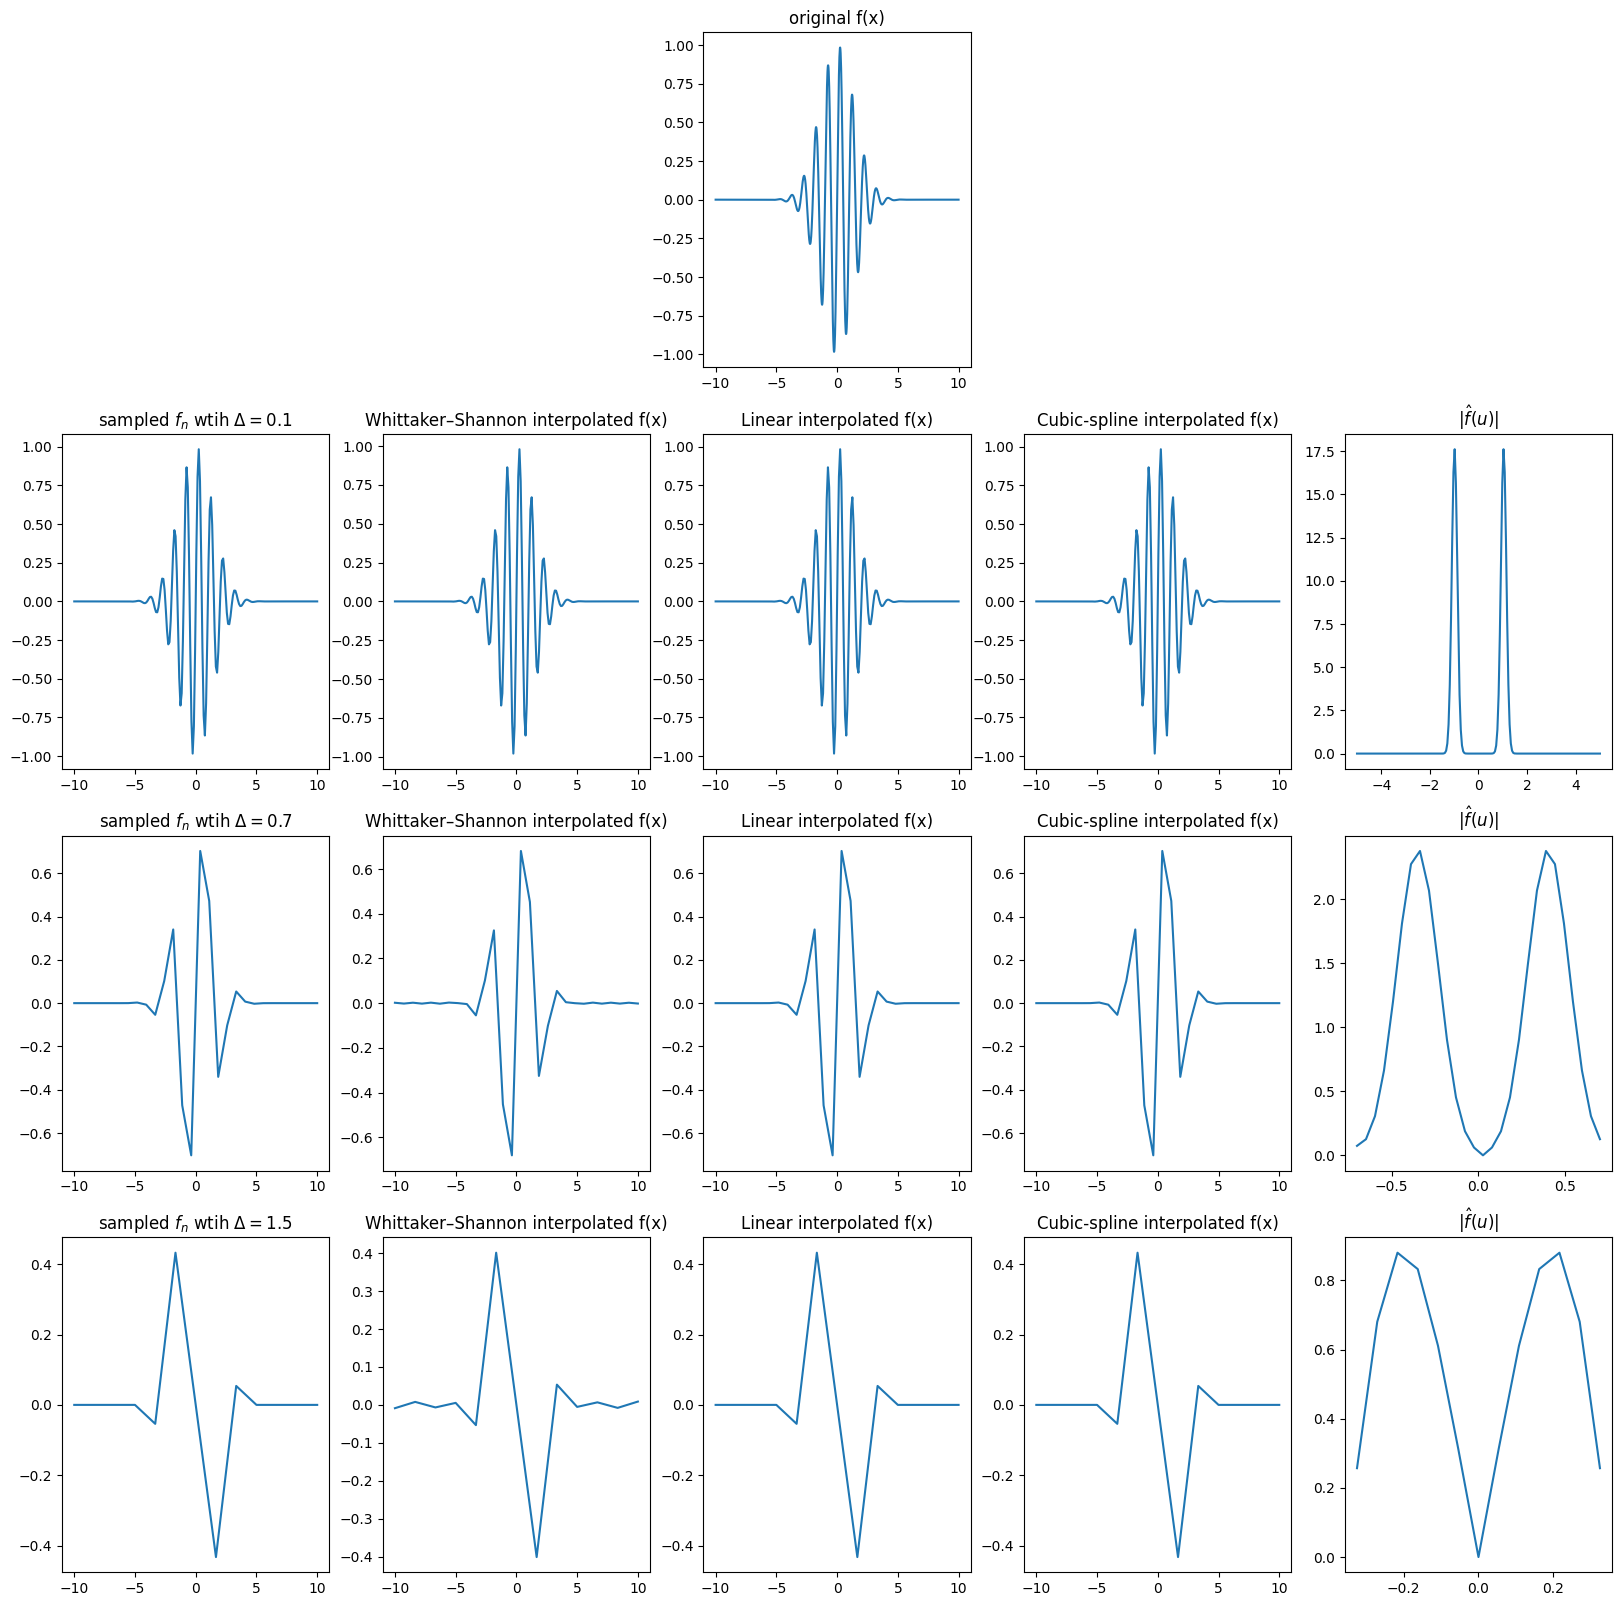

In [ ]:
plt.rcParams['figure.figsize'] = [20, 20]
deltas = [0.1, 0.7, 1.5]
X = 10;
xrange_not_sample=np.linspace(-X,X,1000)

#define the signal function
def f(x):
  f=np.sin(2*np.pi*x)*np.exp(-x**2/4)
  return f

#define Whittaker–Shannon interpolation
'''def shannon_interpolation(f_values, B, x):
    n = np.arange(len(f_values))
    return np.sum(f_values * np.sinc(2 * B * x - n))'''

def shannon_interpolation(f_values, B, x, sample_points):
    n_values = sample_points * 2 * B                  # Convert sample points to their respective 'n' values
    return np.sum(f_values * np.sinc(2 * B * x - n_values))

plt.subplot(4,5,3)
plt.plot(xrange_not_sample,f(xrange_not_sample))
plt.title('original f(x)')
#delta = 0.1;

plot_position = 6
for delta in deltas:
    N=np.int(2*X/delta)
    B=N/(4*X)
    xrange=np.linspace(-X,X,N)
    urange=np.linspace(-B,B,N)

    plt.subplot(4,5,plot_position)
    plt.plot(xrange,f(xrange))
    plt.title(f'sampled $f_n$ wtih $\Delta={delta}$')
    plot_position += 1

    #uUpSample=np.linspace(-B,B,8*N)
    xUpSample=np.linspace(-X,X,8*N)
    samples_bandlimited = f(xrange)

    # Get the array of the shannon interpolated values
    shannon_interpolated_values = [shannon_interpolation(samples_bandlimited, B, x,xrange) for x in xrange]

    plt.subplot(4,5,plot_position)
    xUpSample=np.linspace(-X,X,8*N)
    plt.plot(xrange,shannon_interpolated_values)
    plt.title('Whittaker–Shannon interpolated f(x)')
    plot_position += 1

    fUp1= interp1d(xrange,f(xrange), 'linear')
    plt.subplot(4,5,plot_position)
    plt.plot(xrange,fUp1(xrange))
    plt.title('Linear interpolated f(x)')
    plot_position += 1

    fUp2= InterpolatedUnivariateSpline(xrange,f(xrange), k=3)
    plt.subplot(4,5,plot_position)
    plt.plot(xrange,fUp2(xrange))
    plt.title('Cubic-spline interpolated f(x)')
    plot_position += 1

    plt.subplot(4,5,plot_position)
    plt.plot(urange,np.abs(np.fft.fftshift(np.fft.fft(f(xrange)))))
    plt.title('$|{\hat f}(u)|$')
    plot_position += 1






## Below are also for problem 2 but with a different signal function

<ipython-input-37-7b76ca2eb520>:27: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  N=np.int(2*X/delta)


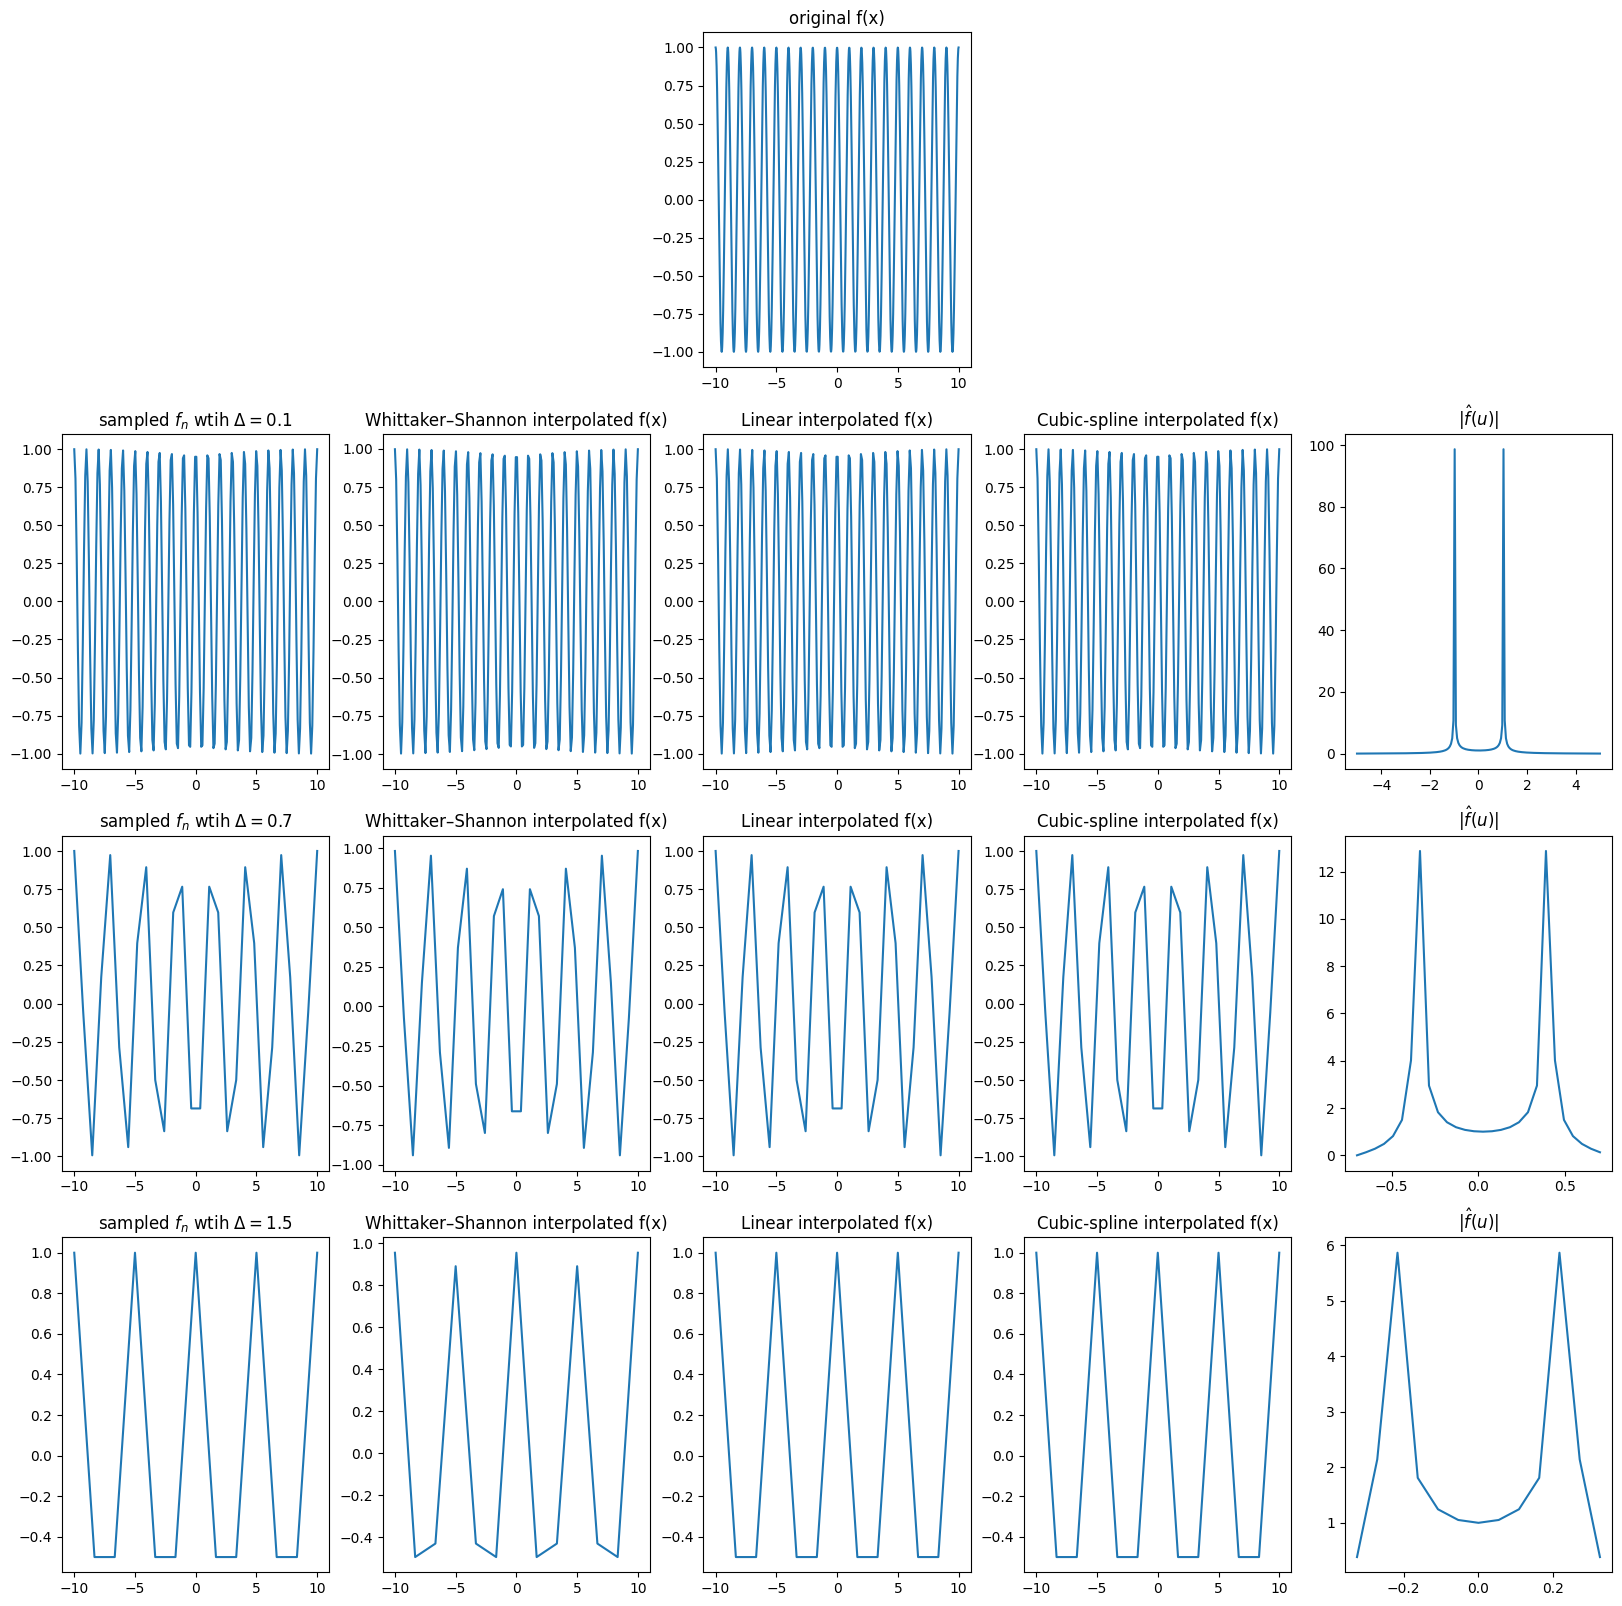

In [ ]:
plt.rcParams['figure.figsize'] = [20, 20]
deltas = [0.1, 0.7, 1.5]
X = 10;
xrange_not_sample=np.linspace(-X,X,1000)

#define the signal function
def f(x):
  f=np.cos(2*np.pi*x)
  return f

#define Whittaker–Shannon interpolation
'''def shannon_interpolation(f_values, B, x):
    n = np.arange(len(f_values))
    return np.sum(f_values * np.sinc(2 * B * x - n))'''

def shannon_interpolation(f_values, B, x, sample_points):
    n_values = sample_points * 2 * B                  # Convert sample points to their respective 'n' values
    return np.sum(f_values * np.sinc(2 * B * x - n_values))

plt.subplot(4,5,3)
plt.plot(xrange_not_sample,f(xrange_not_sample))
plt.title('original f(x)')
#delta = 0.1;

plot_position = 6
for delta in deltas:
    N=np.int(2*X/delta)
    B=N/(4*X)
    xrange=np.linspace(-X,X,N)
    urange=np.linspace(-B,B,N)

    plt.subplot(4,5,plot_position)
    plt.plot(xrange,f(xrange))
    plt.title(f'sampled $f_n$ wtih $\Delta={delta}$')
    plot_position += 1

    #uUpSample=np.linspace(-B,B,8*N)
    xUpSample=np.linspace(-X,X,8*N)
    samples_bandlimited = f(xrange)

    # Get the array of the shannon interpolated values
    shannon_interpolated_values = [shannon_interpolation(samples_bandlimited, B, x,xrange) for x in xrange]

    plt.subplot(4,5,plot_position)
    xUpSample=np.linspace(-X,X,8*N)
    plt.plot(xrange,shannon_interpolated_values)
    plt.title('Whittaker–Shannon interpolated f(x)')
    plot_position += 1

    fUp1= interp1d(xrange,f(xrange), 'linear')
    plt.subplot(4,5,plot_position)
    plt.plot(xrange,fUp1(xrange))
    plt.title('Linear interpolated f(x)')
    plot_position += 1

    fUp2= InterpolatedUnivariateSpline(xrange,f(xrange), k=3)
    plt.subplot(4,5,plot_position)
    plt.plot(xrange,fUp2(xrange))
    plt.title('Cubic-spline interpolated f(x)')
    plot_position += 1

    plt.subplot(4,5,plot_position)
    plt.plot(urange,np.abs(np.fft.fftshift(np.fft.fft(f(xrange)))))
    plt.title('$|{\hat f}(u)|$')
    plot_position += 1

## Comment for problem 2: I used different sampling periods for different signal functions. It is obvious that the more sample points, the better interpolation we can have. Also, when the sampling period is less than Nyquist frequency, the alisaing effect occurs.

## There is no huge difference among the three interpolation methods: Whittaker-Shannon, Linear and Cubic-spline. This may due to the fact that the signal function I choose are similar.




## Problem 3:
## Here, I upload an image of my two cats onto github, and directly download it through the Juptyer Notebook and display it as below. The image processing is similar with the provided code.

In [ ]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display, clear_output
from PIL import Image
import ipywidgets as widgets
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from skimage import io
import scipy.integrate as integrate
from google.colab import files
%matplotlib inline
import warnings
import scipy.integrate as integrate
import pywt

plt.rcParams['figure.figsize'] = [20, 10]

In [ ]:
#import matplotlib.pyplot as plt
#import matplotlib.image as mpimg

#img = mpimg.imread('C:\\Users\\tiany\\Desktop\\cats.jpg')
#imgplot = plt.imshow(img)
#plt.show()


In [ ]:
!wget https://raw.githubusercontent.com/Tianyao-star/picture/main/cats.jpg


--2023-09-05 18:05:56--  https://raw.githubusercontent.com/Tianyao-star/picture/main/cats.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 270617 (264K) [image/jpeg]
Saving to: ‘cats.jpg’

cats.jpg            100%[===================>] 264.27K  --.-KB/s    in 0.04s   

2023-09-05 18:05:56 (7.17 MB/s) - ‘cats.jpg’ saved [270617/270617]



In [ ]:
pop=io.imread('cats.jpg',as_gray=True)
pop=np.rot90(pop,k=-1)

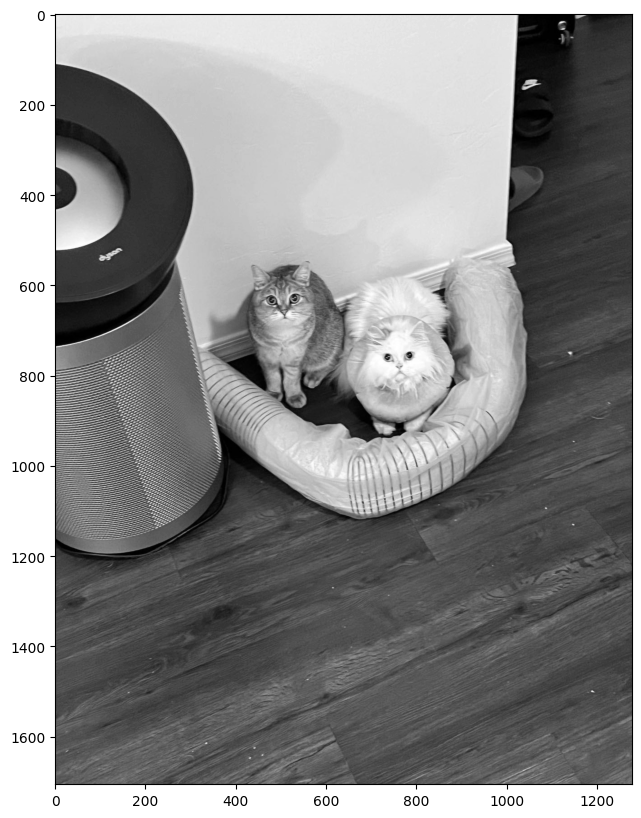

In [ ]:
plt.imshow(pop,cmap=plt.cm.gray)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

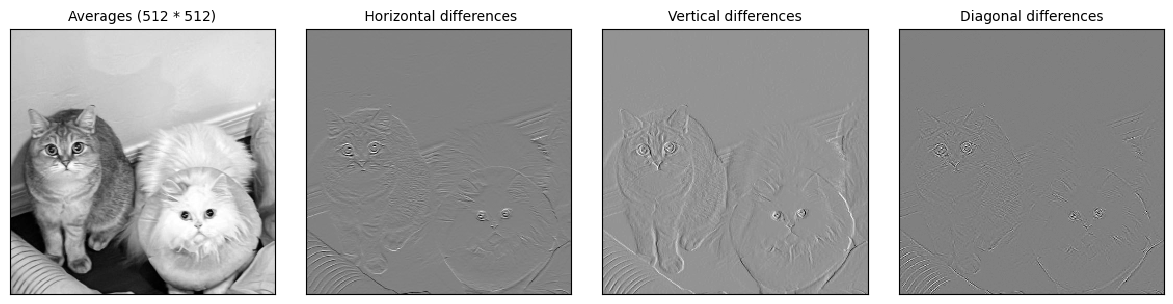

In [ ]:
# Wavelet transform of image, and plot approximation and details
titles = ['Averages (512 * 512)', ' Horizontal differences',
          'Vertical differences', 'Diagonal differences']
coeffs2 = pywt.dwt2(pop[400:912,400:912], 'haar')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()
fig.savefig('bridge1.png', bbox_inches = 'tight', pad_inches = 0)
fig.show()
files.download('bridge1.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

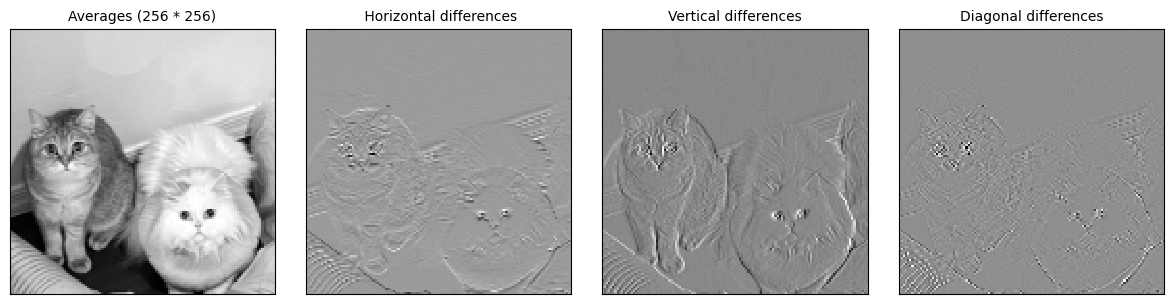

In [ ]:
# Wavelet transform of image, and plot approximation and details
titles = ['Averages (256 * 256)', ' Horizontal differences',
          'Vertical differences', 'Diagonal differences']
coeffs2 = pywt.dwt2(LL, 'haar')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()
fig.savefig('bridge2.png', bbox_inches = 'tight', pad_inches = 0)
files.download('bridge2.png')
fig.show()

## Below is the image rotated by 35 deg and do the similar process

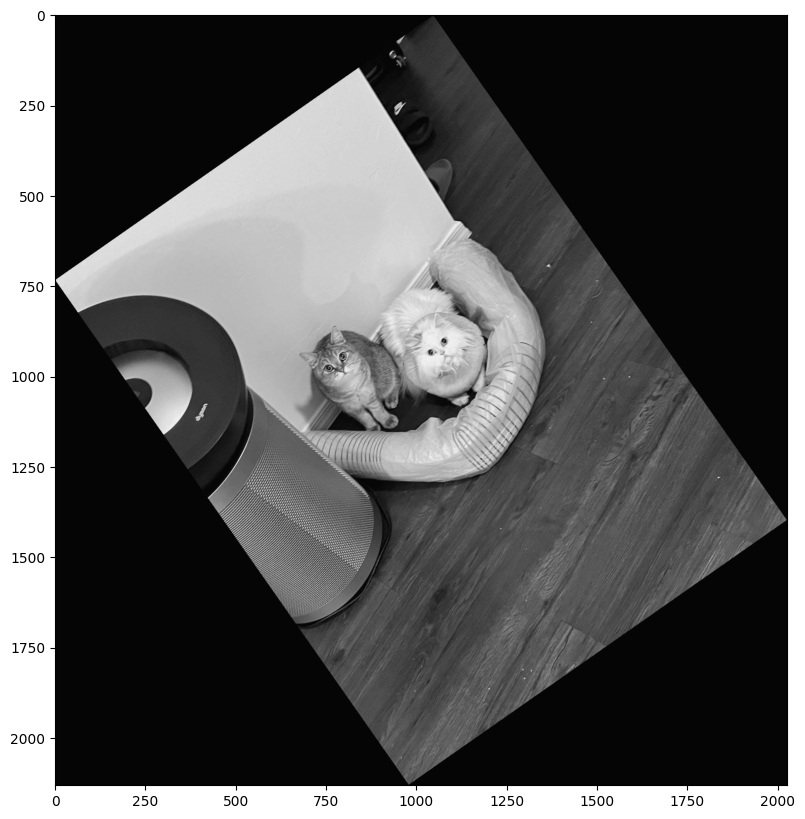

In [ ]:
from scipy.ndimage import rotate
pop=io.imread('cats.jpg',as_gray=True)
pop=rotate(pop,-55)
plt.imshow(pop,cmap=plt.cm.gray)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

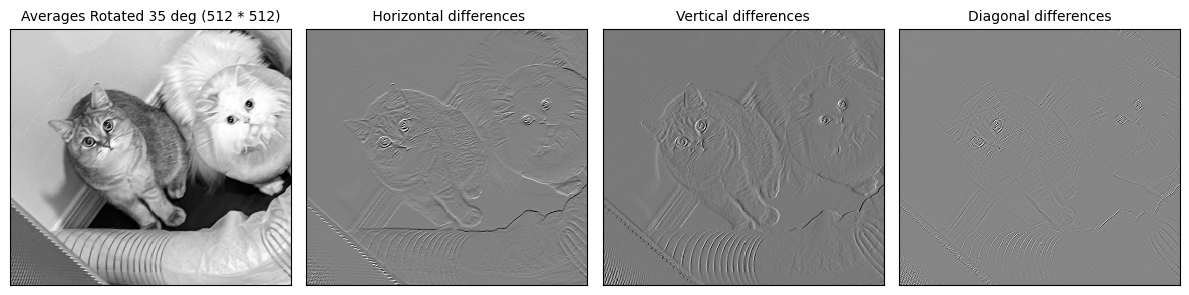

In [ ]:
# Wavelet transform of image, and plot approximation and details
titles = ['Averages Rotated 35 deg (512 * 512)', ' Horizontal differences',
          'Vertical differences', 'Diagonal differences']
coeffs2 = pywt.dwt2(pop[750:1262,600:1162], 'haar')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()
fig.savefig('bridge1.png', bbox_inches = 'tight', pad_inches = 0)
fig.show()
files.download('bridge1.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

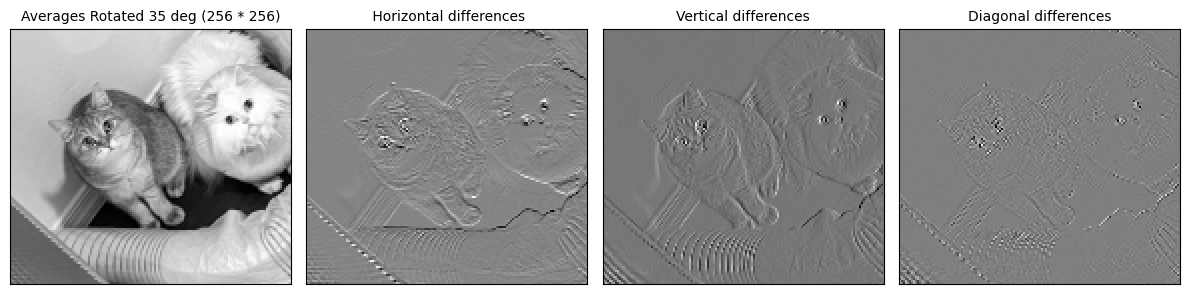

In [ ]:
# Wavelet transform of image, and plot approximation and details
titles = ['Averages Rotated 35 deg (256 * 256)', ' Horizontal differences',
          'Vertical differences', 'Diagonal differences']
coeffs2 = pywt.dwt2(LL, 'haar')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()
fig.savefig('bridge2.png', bbox_inches = 'tight', pad_inches = 0)
files.download('bridge2.png')
fig.show()

## It can be found that by rotating the input image, the sharp edge is easier to identify. Also, the less image resolution, the better observation of the edge due to the sparse sampling to soften the edge.


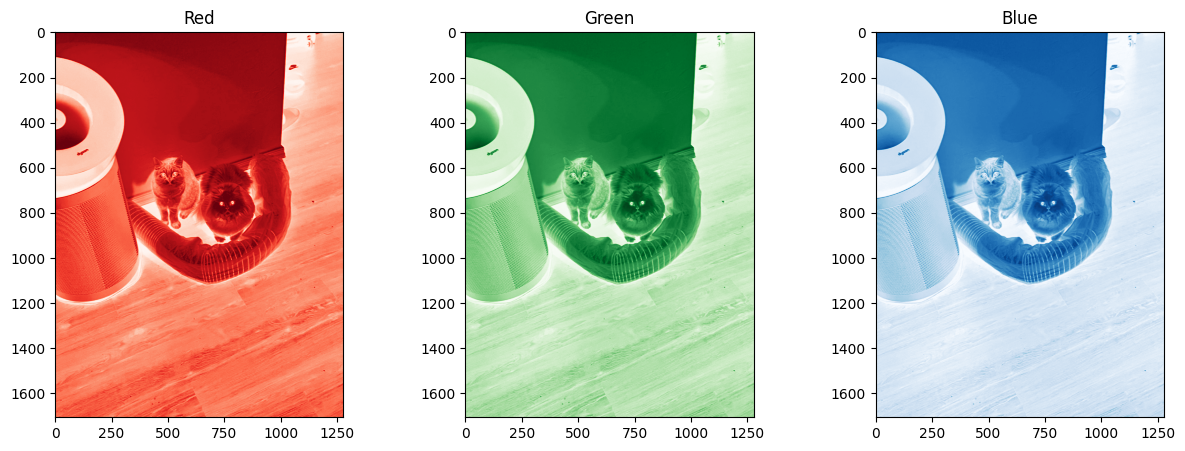

In [ ]:
from scipy.ndimage import rotate
from skimage import io

pop=io.imread('cats.jpg')
pop=rotate(pop,-90)


'''#extract red channel from the input RGB image
pop_red = pop[:,:,0]
plt.imshow(pop_red,cmap='Reds')

#extract green channel
pop_green = pop[:,:,1]
plt.imshow(pop_green,cmap='Greens')

#extract blue channel
pop_blue = pop[:,:,2]
plt.imshow(pop_blue,cmap='Blues')'''


fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Extract and plot the red channel
pop_red = pop[:,:,0]
axs[0].imshow(pop_red, cmap='Reds')
axs[0].set_title('Red')

# Extract and plot the green channel
pop_green = pop[:,:,1]
axs[1].imshow(pop_green, cmap='Greens')
axs[1].set_title('Green')

# Extract and plot the blue channel
pop_blue = pop[:,:,2]
axs[2].imshow(pop_blue, cmap='Blues')
axs[2].set_title('Blue')

plt.show()

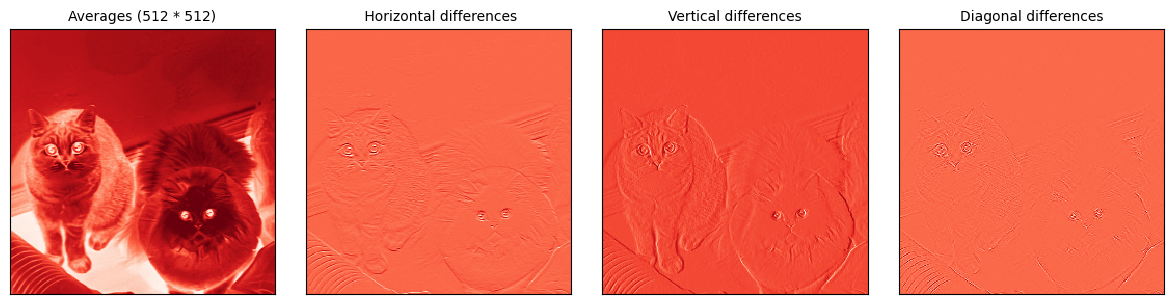

In [ ]:
# Wavelet transform of image, and plot approximation and details
titles = ['Averages (512 * 512)', ' Horizontal differences',
          'Vertical differences', 'Diagonal differences']
coeffs2 = pywt.dwt2(pop_red[400:912,400:912], 'haar')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap='Reds')
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()
#fig.savefig('bridge1.png', bbox_inches = 'tight', pad_inches = 0)
fig.show()


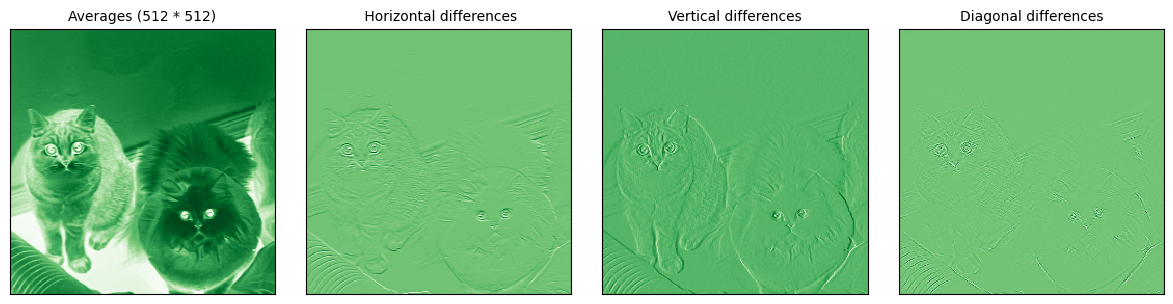

In [ ]:
# Wavelet transform of image, and plot approximation and details
titles = ['Averages (512 * 512)', ' Horizontal differences',
          'Vertical differences', 'Diagonal differences']
coeffs2 = pywt.dwt2(pop_green[400:912,400:912], 'haar')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap='Greens')
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()
#fig.savefig('bridge1.png', bbox_inches = 'tight', pad_inches = 0)
fig.show()


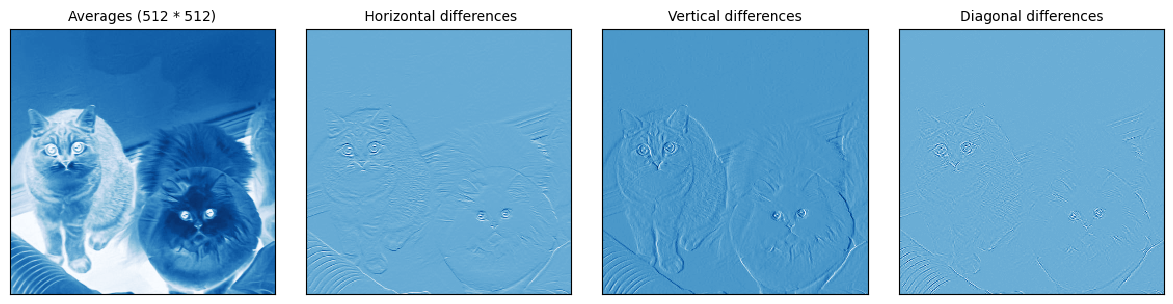

In [ ]:
# Wavelet transform of image, and plot approximation and details
titles = ['Averages (512 * 512)', ' Horizontal differences',
          'Vertical differences', 'Diagonal differences']
coeffs2 = pywt.dwt2(pop_blue[400:912,400:912], 'haar')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap='Blues')
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()
#fig.savefig('bridge1.png', bbox_inches = 'tight', pad_inches = 0)
fig.show()

## For different color channels, there is no huge difference when applying the wavelet transform.

## For problem 4, it is actually very similar with what I have done for problem 2. Here most of the code will be from problem 2 and the given code at 'Discrete Forward Model' with different sampling period.

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, InterpolatedUnivariateSpline
from scipy import integrate

In [ ]:
X=10
def f(x):
  f=np.sin(2*np.pi*(x**2/2))*np.exp(-x**2/10)
  return f
def gn(delta=1):
  N=np.int(2*X/delta)
  gg=np.zeros(N)
  for pop in np.arange(len(gg)):
    gg[pop]=integrate.quad(f,(-X+pop*delta),(-X+(pop+1)*delta))[0]
  return gg

<ipython-input-14-69d2b11c2325>:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  N=np.int(2*X/delta)


Text(0.5, 1.0, '$|{\\hat g}(u)|$')

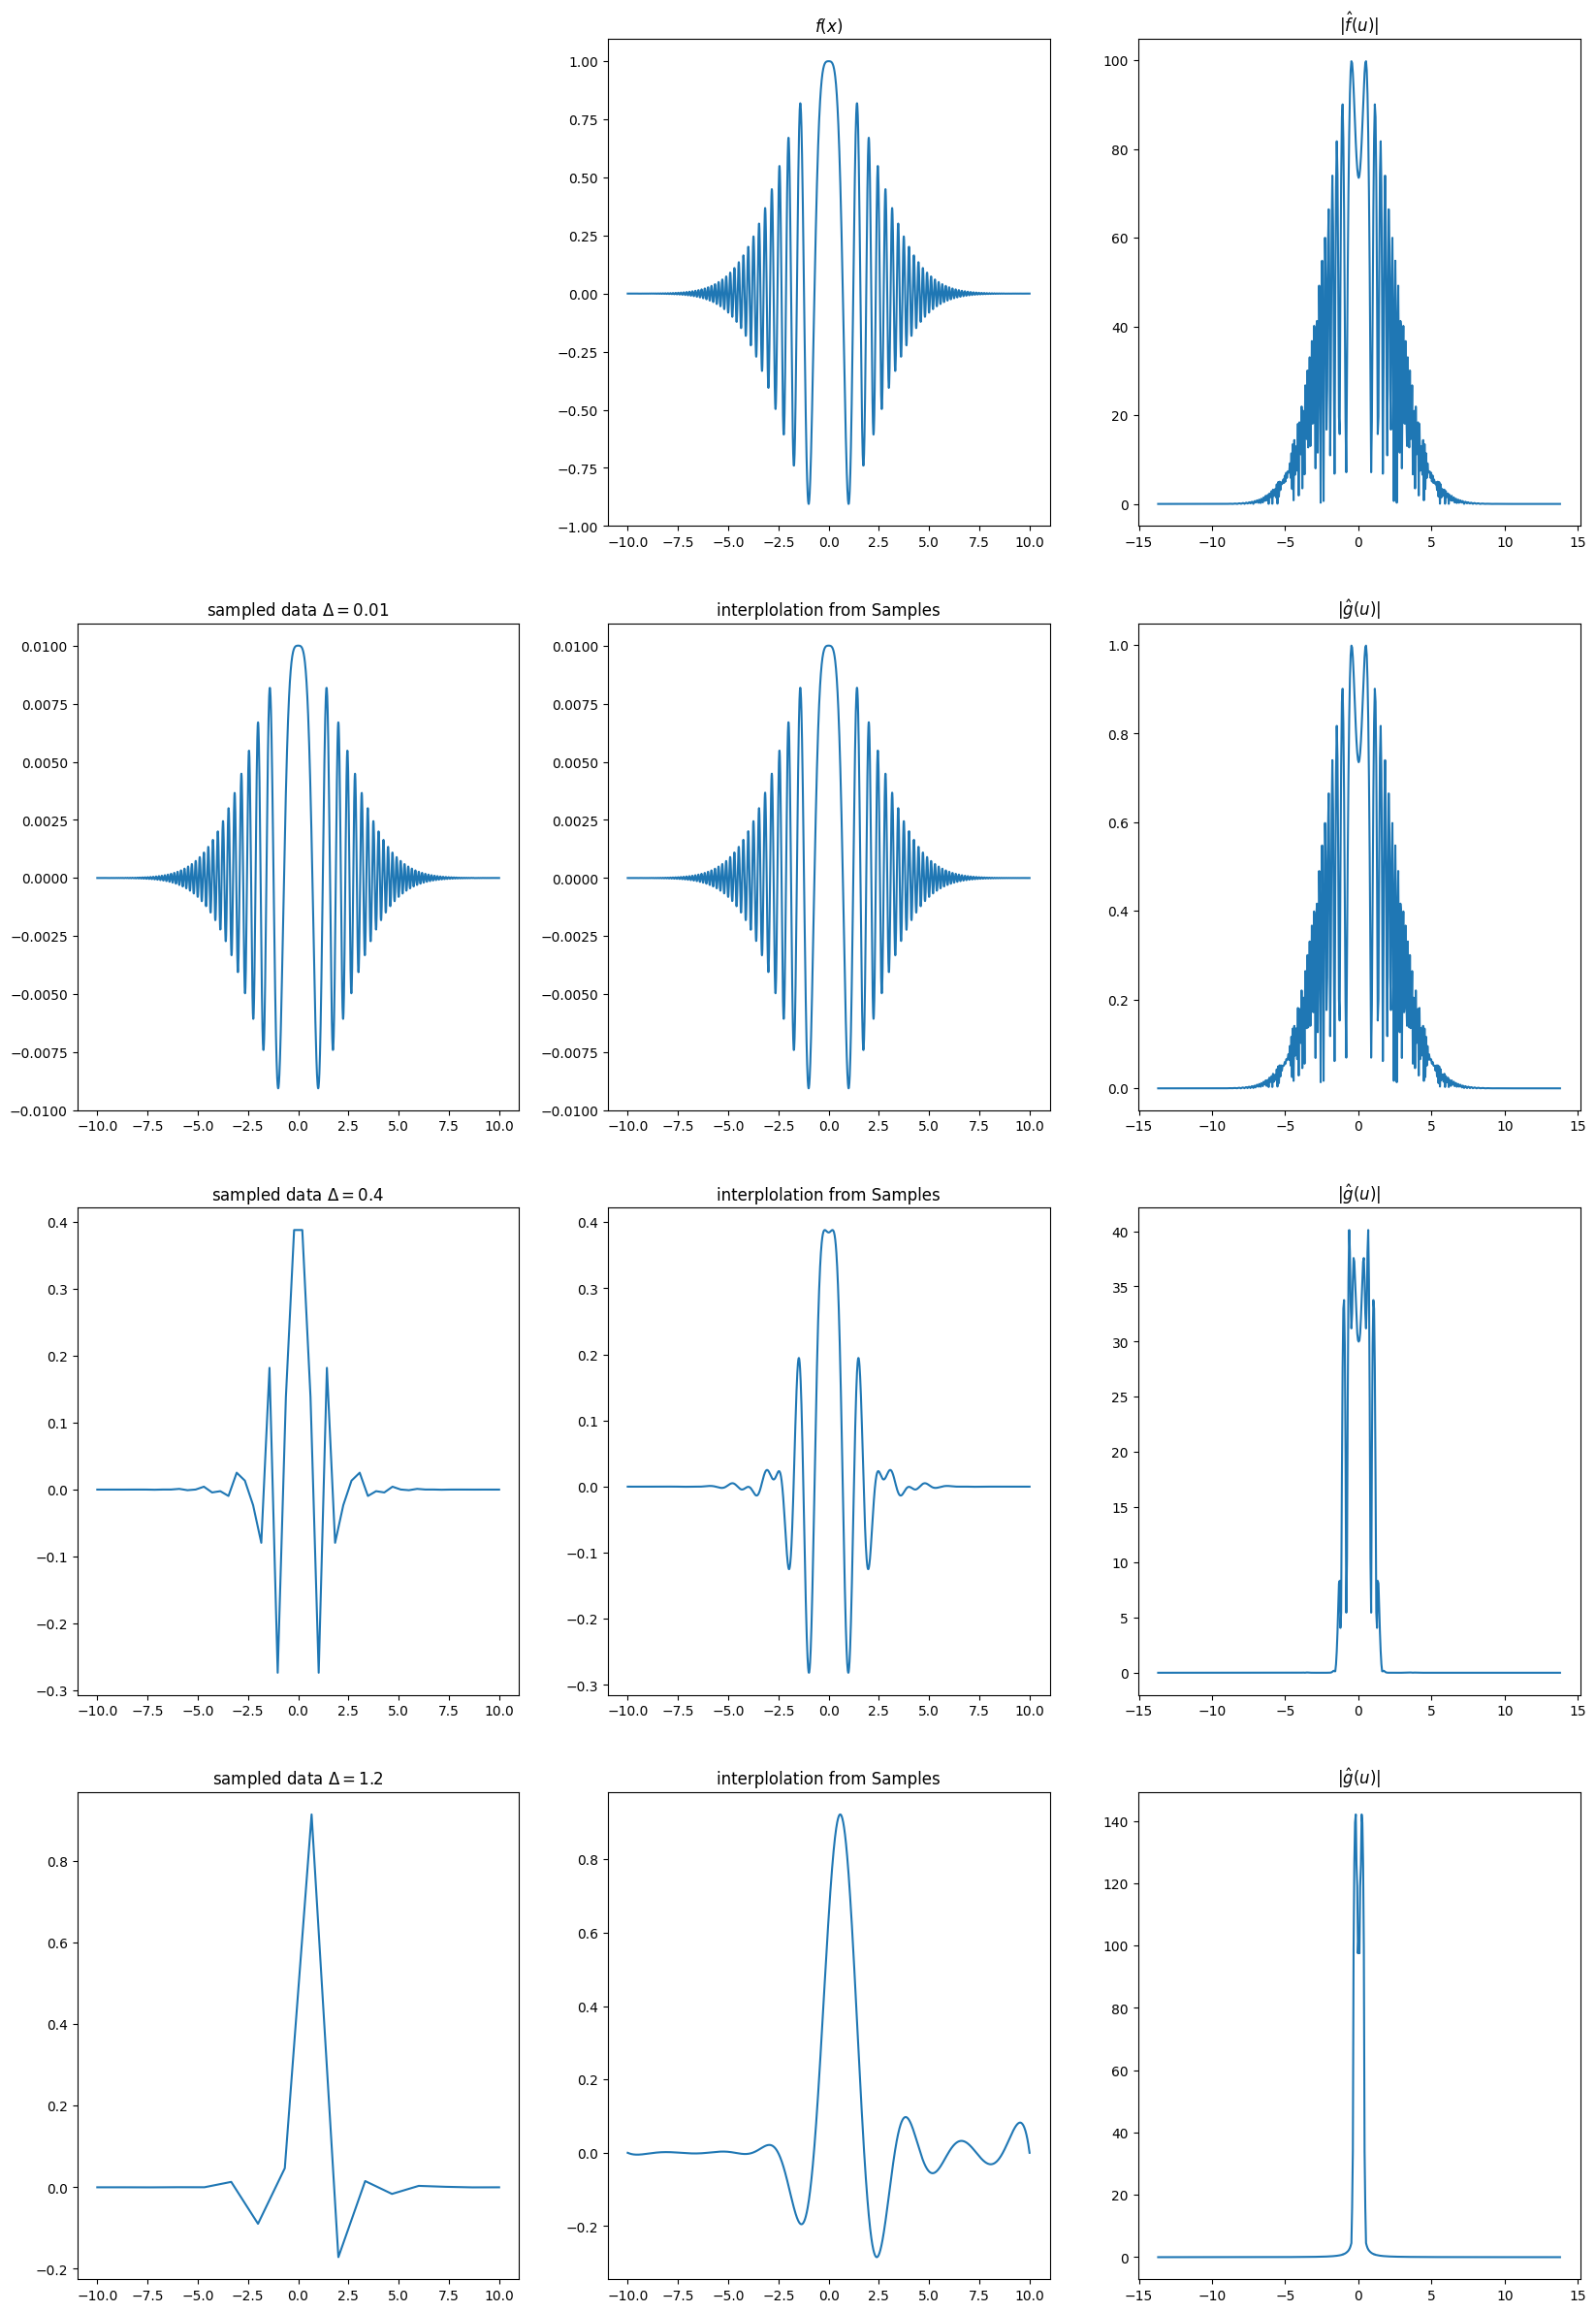

In [ ]:
plt.rcParams['figure.figsize'] = [20, 30]
X=10
xrange=np.linspace(-X,X,2048)
urange=np.linspace(-2048/(4*X),2048/(4*X),2048)
plt.subplot(4,3,2)
plt.plot(xrange,f(xrange))
plt.title('$f(x)$')
plt.subplot(4,3,3)
plt.plot(urange[750:1300],np.abs(np.fft.fftshift(np.fft.fft(f(xrange))))[750:1300])
plt.title('$|{\hat f}(u)|$')
plt.subplot(4,3,4)
gN=gn(.01)
plt.plot(np.linspace(-X,X,len(gN)),gN)
plt.title('sampled data $\Delta=0.01$')
gUp= InterpolatedUnivariateSpline(np.linspace(-X,X,len(gN)),gN, k=5)
plt.subplot(4,3,5)
plt.plot(xrange,gUp(xrange))
plt.title('interplolation from Samples')
plt.subplot(4,3,6)
plt.plot(urange[750:1300],np.abs(np.fft.fftshift(np.fft.fft(gUp(xrange))))[750:1300])
plt.title('$|{\hat g}(u)|$')
plt.subplot(4,3,7)
gN=gn(.4)
plt.plot(np.linspace(-X,X,len(gN)),gN)
plt.title('sampled data $\Delta=0.4$')
gUp= InterpolatedUnivariateSpline(np.linspace(-X,X,len(gN)),gN, k=5)
plt.subplot(4,3,8)
plt.plot(xrange,gUp(xrange))
plt.title('interplolation from Samples')
plt.subplot(4,3,9)
plt.plot(urange[750:1300],np.abs(np.fft.fftshift(np.fft.fft(gUp(xrange))))[750:1300])
plt.title('$|{\hat g}(u)|$')
plt.subplot(4,3,10)
gN=gn(1.2)
plt.plot(np.linspace(-X,X,len(gN)),gN)
plt.title('sampled data $\Delta=1.2$')
gUp= InterpolatedUnivariateSpline(np.linspace(-X,X,len(gN)),gN, k=5)
plt.subplot(4,3,11)
plt.plot(xrange,gUp(xrange))
plt.title('interplolation from Samples')
plt.subplot(4,3,12)
plt.plot(urange[750:1300],np.abs(np.fft.fftshift(np.fft.fft(gUp(xrange))))[750:1300])
plt.title('$|{\hat g}(u)|$')
#plt.savefig('sampleFiltering.png')
#files.download('sampleFiltering.png')



In [ ]:
X=10
def f(x):
  f=np.sin(2*np.pi*(x**3/2))*np.exp(-x**2/2)
  return f
def gn(delta=1):
  N=np.int(2*X/delta)
  gg=np.zeros(N)
  for pop in np.arange(len(gg)):
    gg[pop]=integrate.quad(f,(-X+pop*delta),(-X+(pop+1)*delta))[0]
  return gg

<ipython-input-24-4eb51542716a>:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  N=np.int(2*X/delta)


Text(0.5, 1.0, '$|{\\hat g}(u)|$')

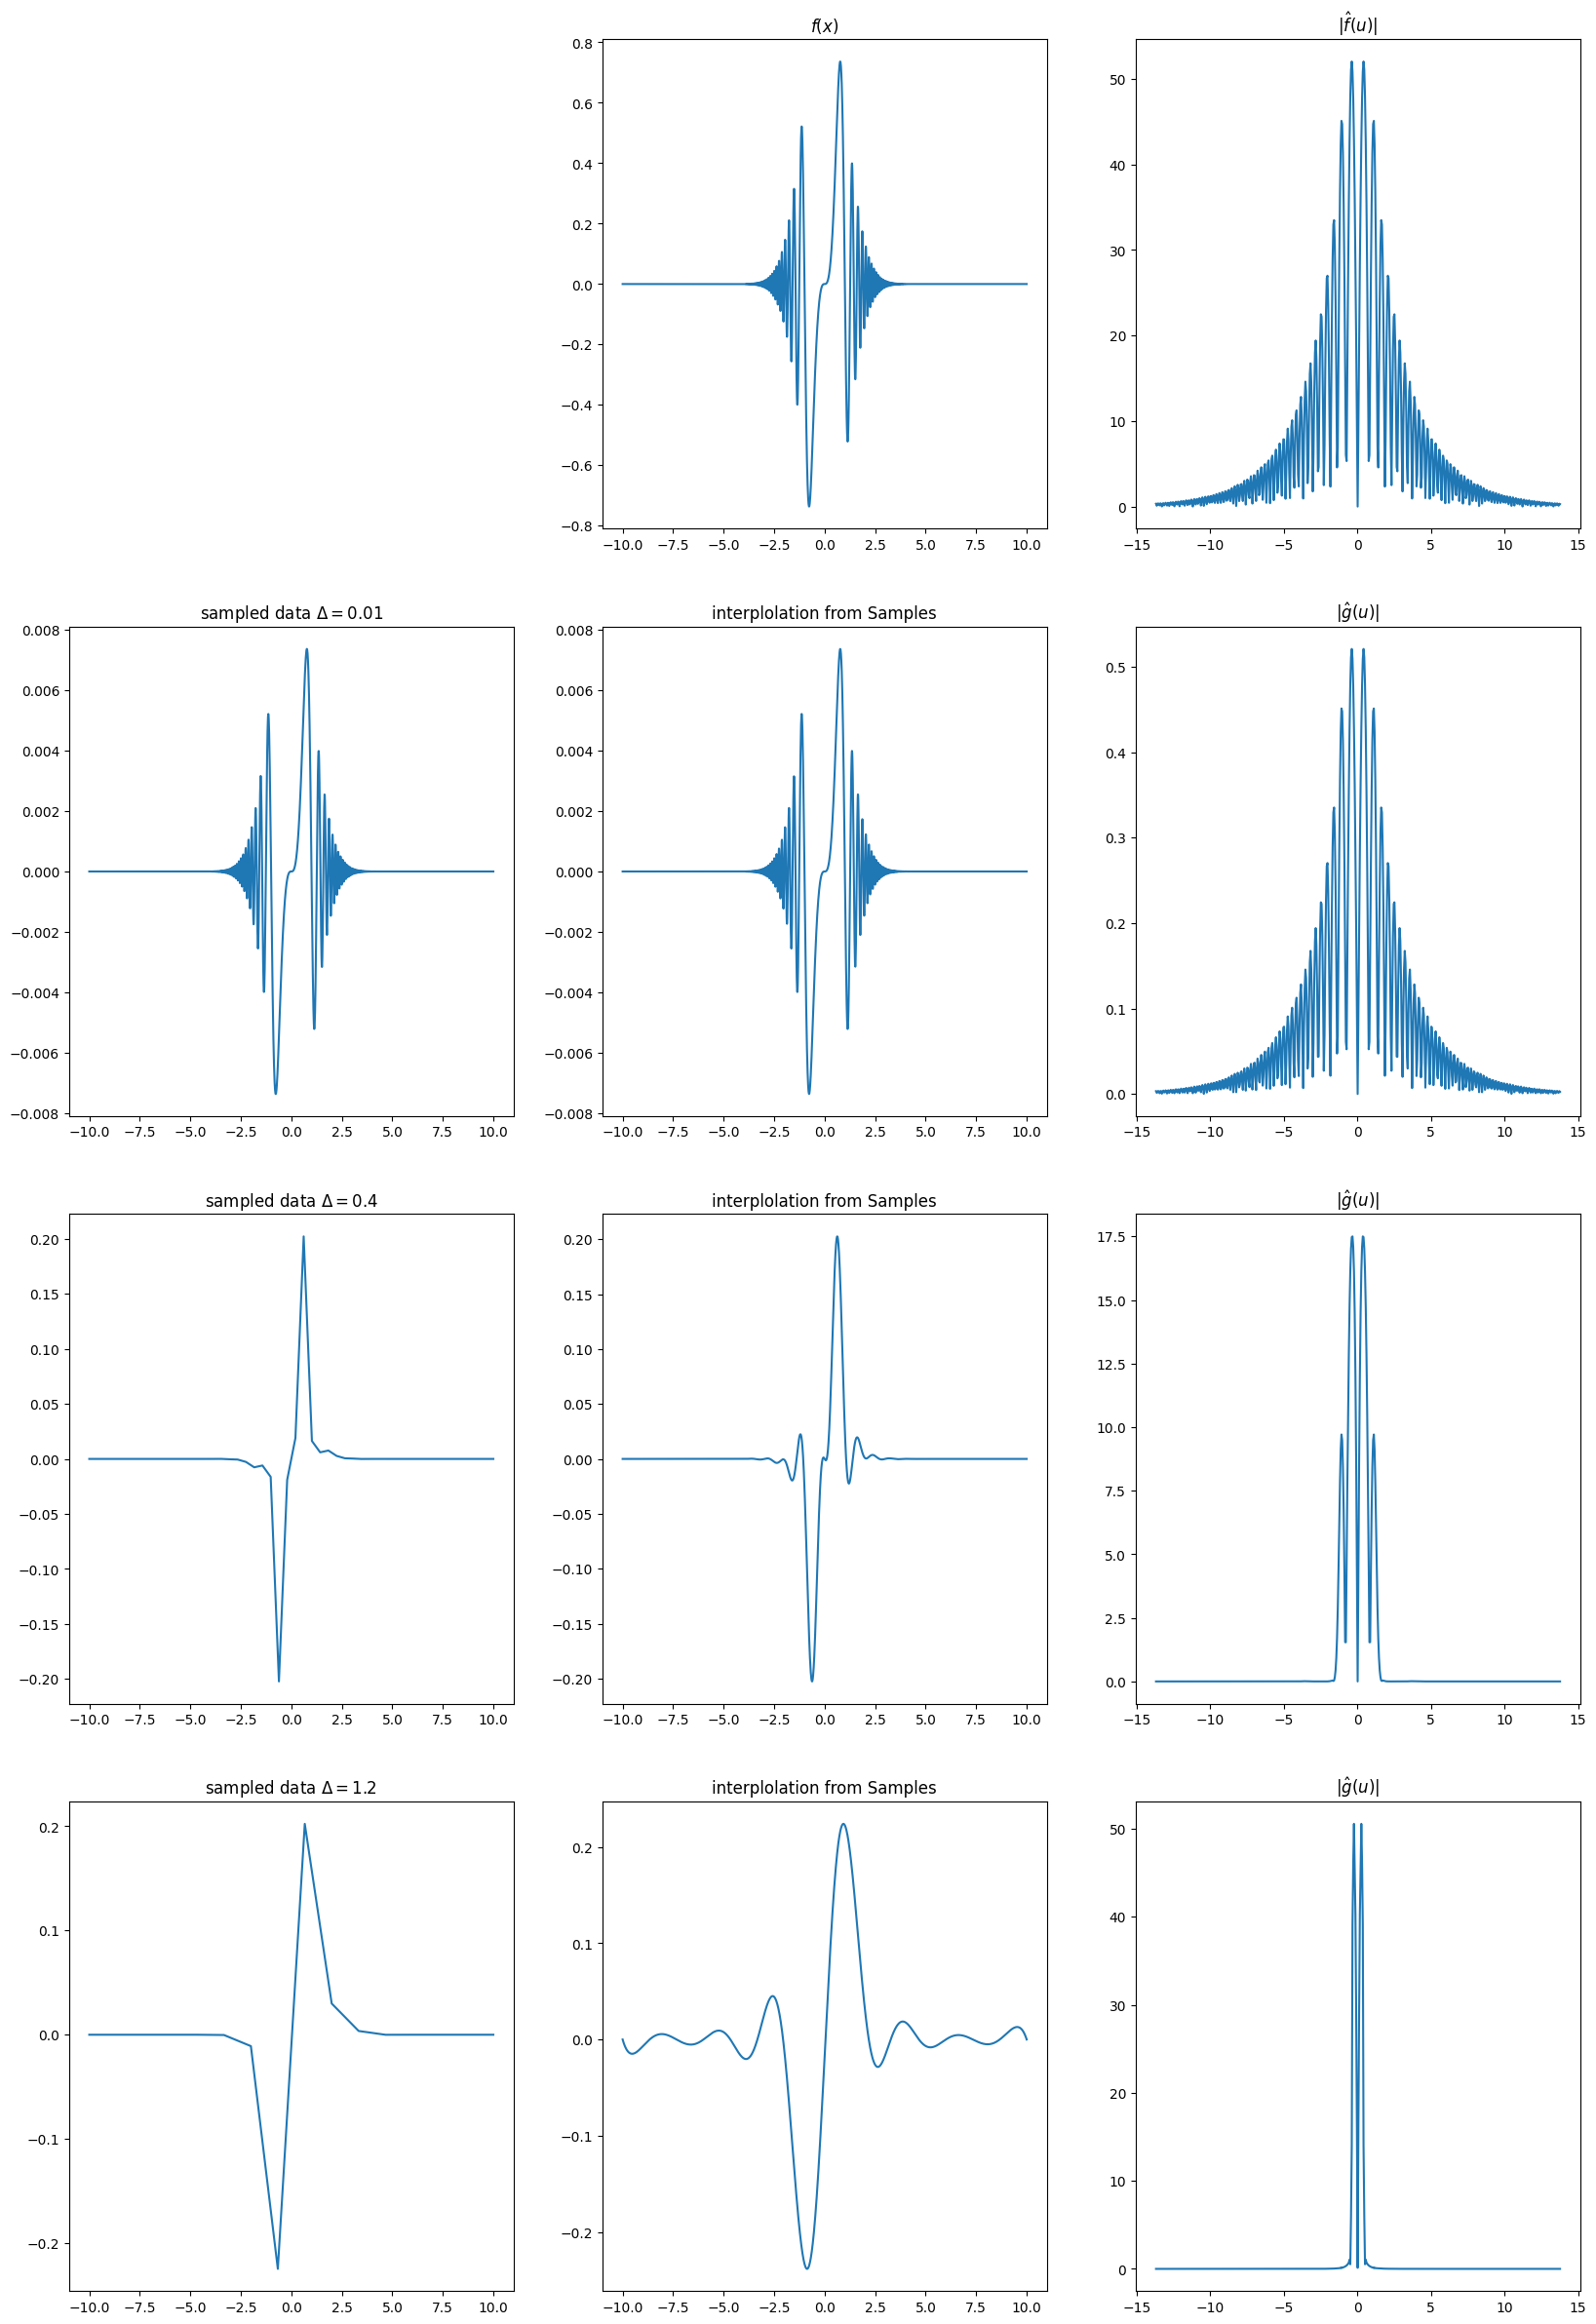

In [ ]:
plt.rcParams['figure.figsize'] = [20, 30]
X=10
xrange=np.linspace(-X,X,2048)
urange=np.linspace(-2048/(4*X),2048/(4*X),2048)
plt.subplot(4,3,2)
plt.plot(xrange,f(xrange))
plt.title('$f(x)$')
plt.subplot(4,3,3)
plt.plot(urange[750:1300],np.abs(np.fft.fftshift(np.fft.fft(f(xrange))))[750:1300])
plt.title('$|{\hat f}(u)|$')
plt.subplot(4,3,4)
gN=gn(.01)
plt.plot(np.linspace(-X,X,len(gN)),gN)
plt.title('sampled data $\Delta=0.01$')
gUp= InterpolatedUnivariateSpline(np.linspace(-X,X,len(gN)),gN, k=5)
plt.subplot(4,3,5)
plt.plot(xrange,gUp(xrange))
plt.title('interplolation from Samples')
plt.subplot(4,3,6)
plt.plot(urange[750:1300],np.abs(np.fft.fftshift(np.fft.fft(gUp(xrange))))[750:1300])
plt.title('$|{\hat g}(u)|$')
plt.subplot(4,3,7)
gN=gn(.4)
plt.plot(np.linspace(-X,X,len(gN)),gN)
plt.title('sampled data $\Delta=0.4$')
gUp= InterpolatedUnivariateSpline(np.linspace(-X,X,len(gN)),gN, k=5)
plt.subplot(4,3,8)
plt.plot(xrange,gUp(xrange))
plt.title('interplolation from Samples')
plt.subplot(4,3,9)
plt.plot(urange[750:1300],np.abs(np.fft.fftshift(np.fft.fft(gUp(xrange))))[750:1300])
plt.title('$|{\hat g}(u)|$')
plt.subplot(4,3,10)
gN=gn(1.2)
plt.plot(np.linspace(-X,X,len(gN)),gN)
plt.title('sampled data $\Delta=1.2$')
gUp= InterpolatedUnivariateSpline(np.linspace(-X,X,len(gN)),gN, k=5)
plt.subplot(4,3,11)
plt.plot(xrange,gUp(xrange))
plt.title('interplolation from Samples')
plt.subplot(4,3,12)
plt.plot(urange[750:1300],np.abs(np.fft.fftshift(np.fft.fft(gUp(xrange))))[750:1300])
plt.title('$|{\hat g}(u)|$')
#plt.savefig('sampleFiltering.png')
#files.download('sampleFiltering.png')

## Comment: It can clearly seen that the less sampling periods (less pixth pitch), the worse interpolation of the original function. Since the functions I use here both have the frequency as f=2*pi/2*pi = 1, then the Nyquist frequency is 1/2 = 0.5. Here the 3 three sampling periods I choose are way below, close to and way larger than the Nyquist frequency, especially when the sampling frequency is close to the aliasing frequency, the sharp edge becoms more blurred which means it is combined with other low frequency component.

## Now, let's take a look at the low pass filtering on the signal. Here I will just use the Gaussian blur for demonstration based on the given code.

In [ ]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display, clear_output
import ipywidgets as widgets
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.integrate as integrate
%matplotlib inline

In [ ]:
# define the Gaussian function
def h(x,sigma):
  hx=np.exp(-np.pi*(x/sigma)**2)

# define the inverse Fourier transform of the Gaussian blur
  return hx
def hu(u,sigma):
  hu=sigma*np.exp(-np.pi*(sigma*u)**2)
  return hu

<ipython-input-29-530ee05c0e72>:24: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'Inverse Fourier Transform of Example Function')

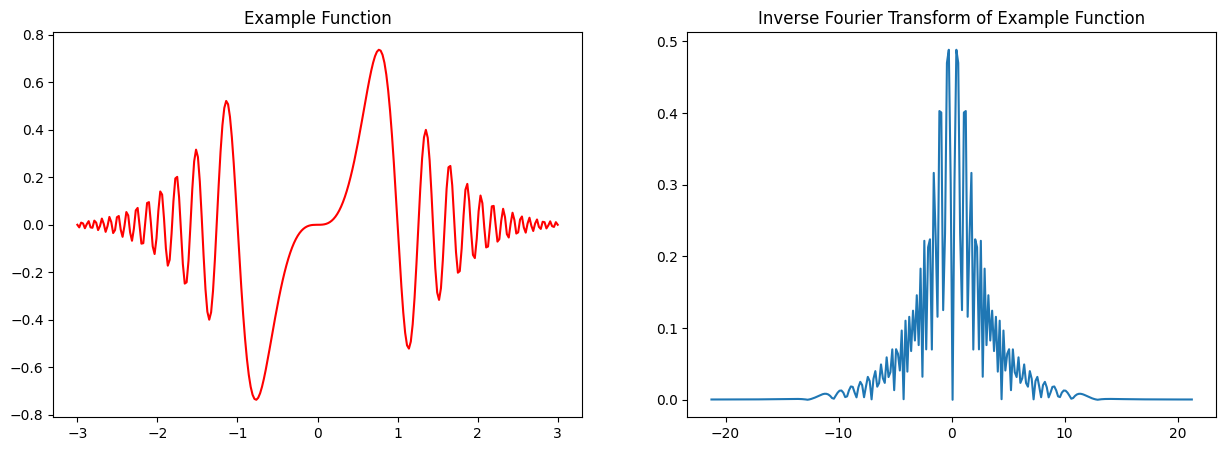

In [ ]:
#define the signal function
def fs(x):
  fs=np.sin(2*np.pi*(x**3/2))*np.exp(-x**2/2)
  return fs

from numpy import vectorize
vf = vectorize(fs)
xm=3
Nn=256
xr=np.linspace(-xm,xm,Nn)
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(xr,vf(xr),'r')
plt.title("Example Function")
dx=xr[2]-xr[1]
ur=np.linspace(-1/(2*dx),1/(2*dx),Nn)
ftI=np.fft.fft(vf(xr))*dx
plt.subplot(1,2,2)
plt.plot(ur,np.abs(np.fft.fftshift(ftI)))
plt.title("Inverse Fourier Transform of Example Function")

<ipython-input-38-cc0cd04c0e70>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,ct)


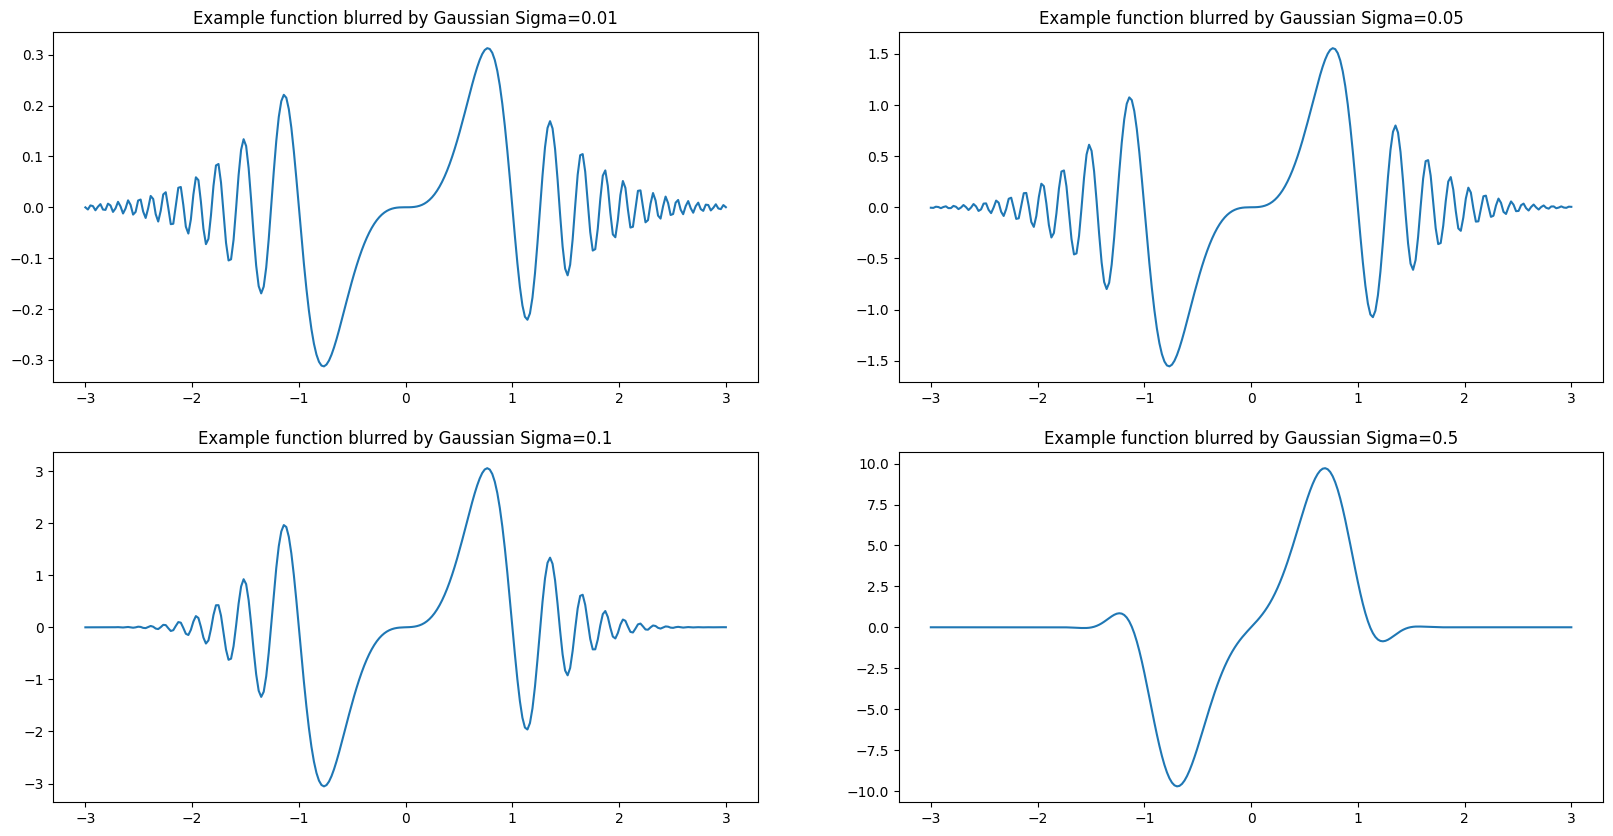

In [ ]:
ct=1
plt.subplots(figsize=(20,10))
for blur in [0.01,0.05,.1, .5]:
  filteredFunction=np.fft.fftshift(ftI)*hu(ur,blur)
  ftIi=np.fft.ifft(np.fft.fftshift(filteredFunction))/dx**2
  plt.subplot(2,2,ct)
  #plt.title("Example function blurred by Gaussian sigma","blur(ct)")
  plt.title(f'Example function blurred by Gaussian Sigma={blur}')
  #plt.title(f'sampled $f_n$ wtih $\Delta={delta}$')
  plt.plot(xr,(ftIi))
  ct=ct+1

## From different blurring coefficients, it is clear see that the broader low band pass filter applying onto the signals, the less sharp components that correspond to high frequency will be maintained.

## For problem 5, I will replicate the figures that shown on textbook and try different values of H matrix.

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, InterpolatedUnivariateSpline
from scipy import integrate
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]
#plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 22})
from google.colab import files
#!apt install texlive-fonts-recommended texlive-fonts-extra

H = [1,1,-1,1,1,1,-1,1]

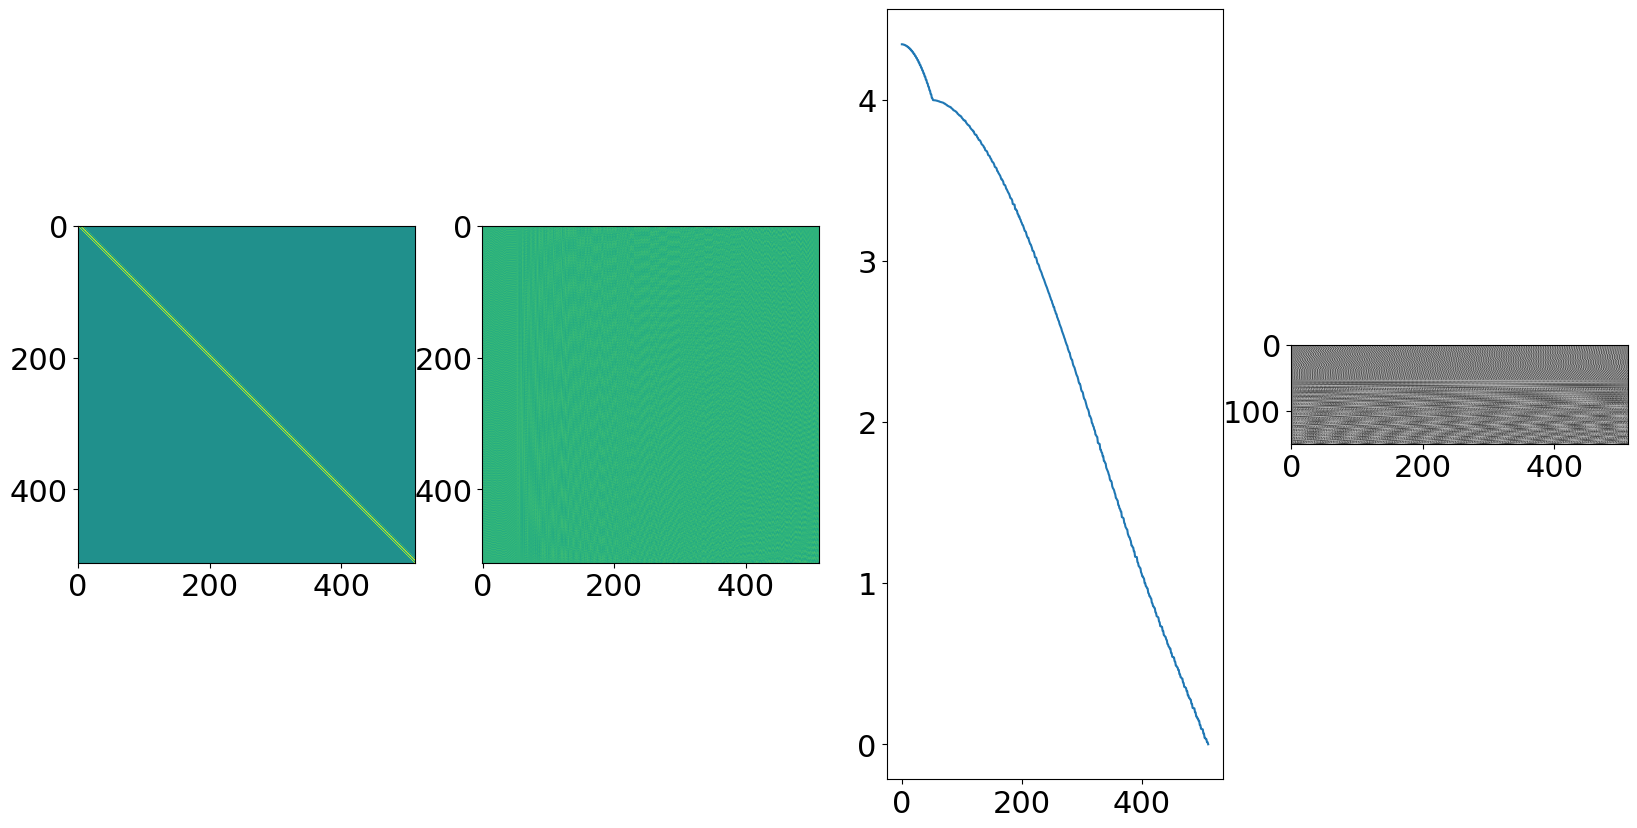

In [ ]:
from scipy.linalg import toeplitz
psf=[1,1,-1,1,1,1,-1,1]
N=512
firstRow=np.concatenate((psf,np.zeros(N-len(psf))))
firstColumn=np.zeros(N)
firstColumn[0]=1
H=toeplitz(firstColumn,firstRow)
u, s, vh=np.linalg.svd(H)

plt.subplot(1, 4, 1)
plt.imshow(H)

plt.subplot(1, 4, 2)
plt.imshow(u)

plt.subplot(1, 4, 3)
plt.plot(s)

plt.subplot(1, 4, 4)
plt.imshow(vh[0:150,:], cmap='gray')

plt.show()

H = tan(h)

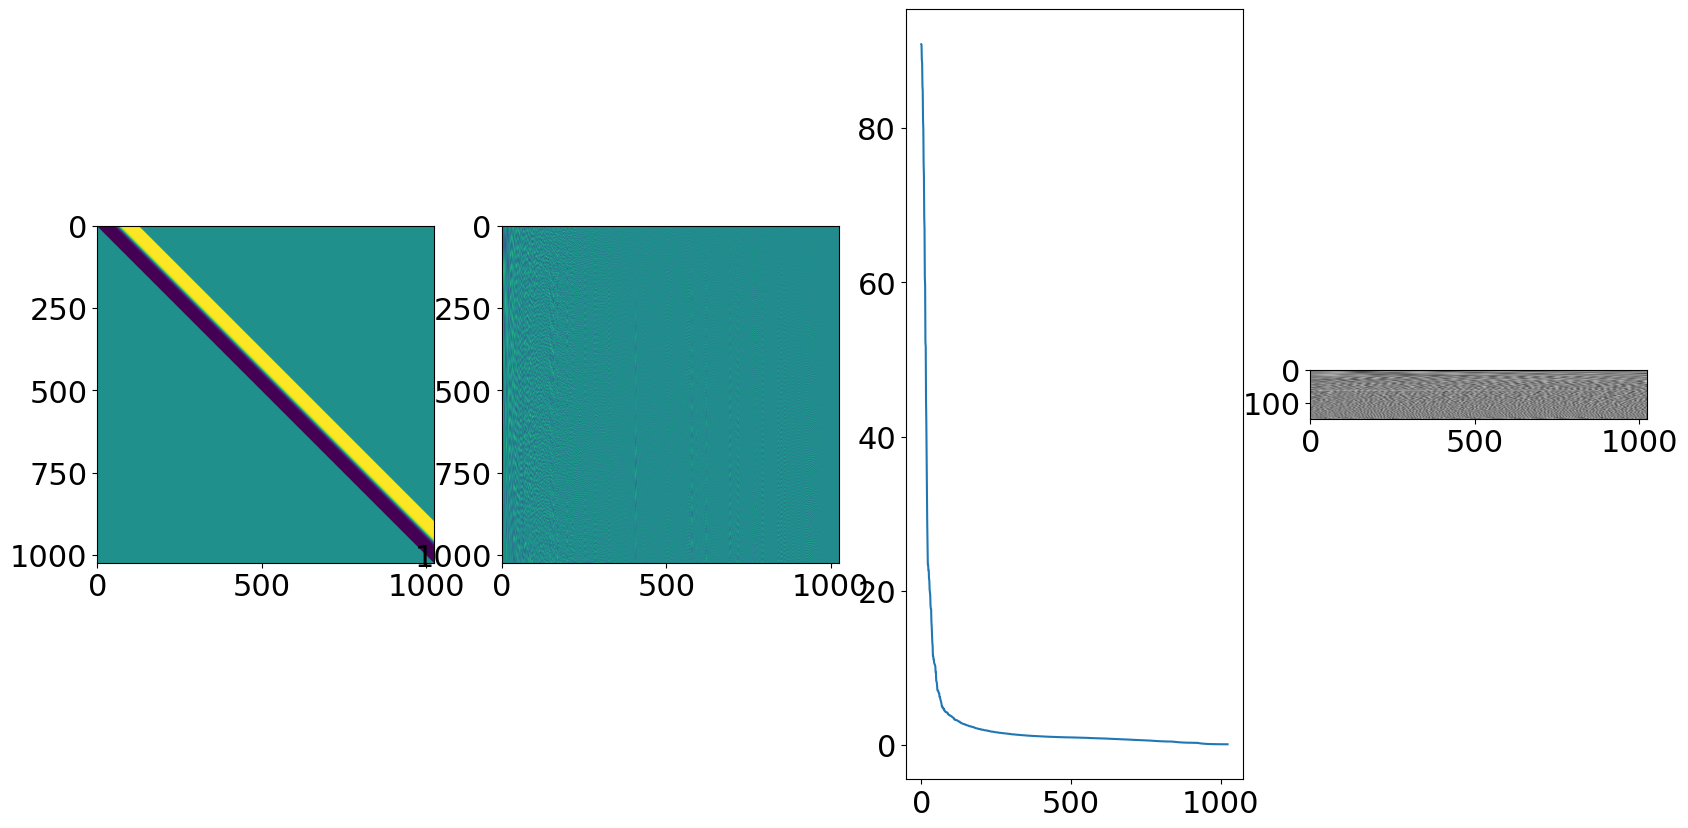

In [ ]:
from scipy.linalg import toeplitz
psf=np.tanh(np.linspace(-10,10,128))
N=1024
firstRow=np.concatenate((psf,np.zeros(N-len(psf))))
firstColumn=np.zeros(N)
firstColumn[0]=firstRow[0]
H=toeplitz(firstColumn,firstRow)
u, s, vh=np.linalg.svd(H)

plt.subplot(1, 4, 1)
plt.imshow(H)

plt.subplot(1, 4, 2)
plt.imshow(u)

plt.subplot(1, 4, 3)
plt.plot(s)

plt.subplot(1, 4, 4)
plt.imshow(vh[0:150,:], cmap='gray')

plt.show()

(tan(h))^2

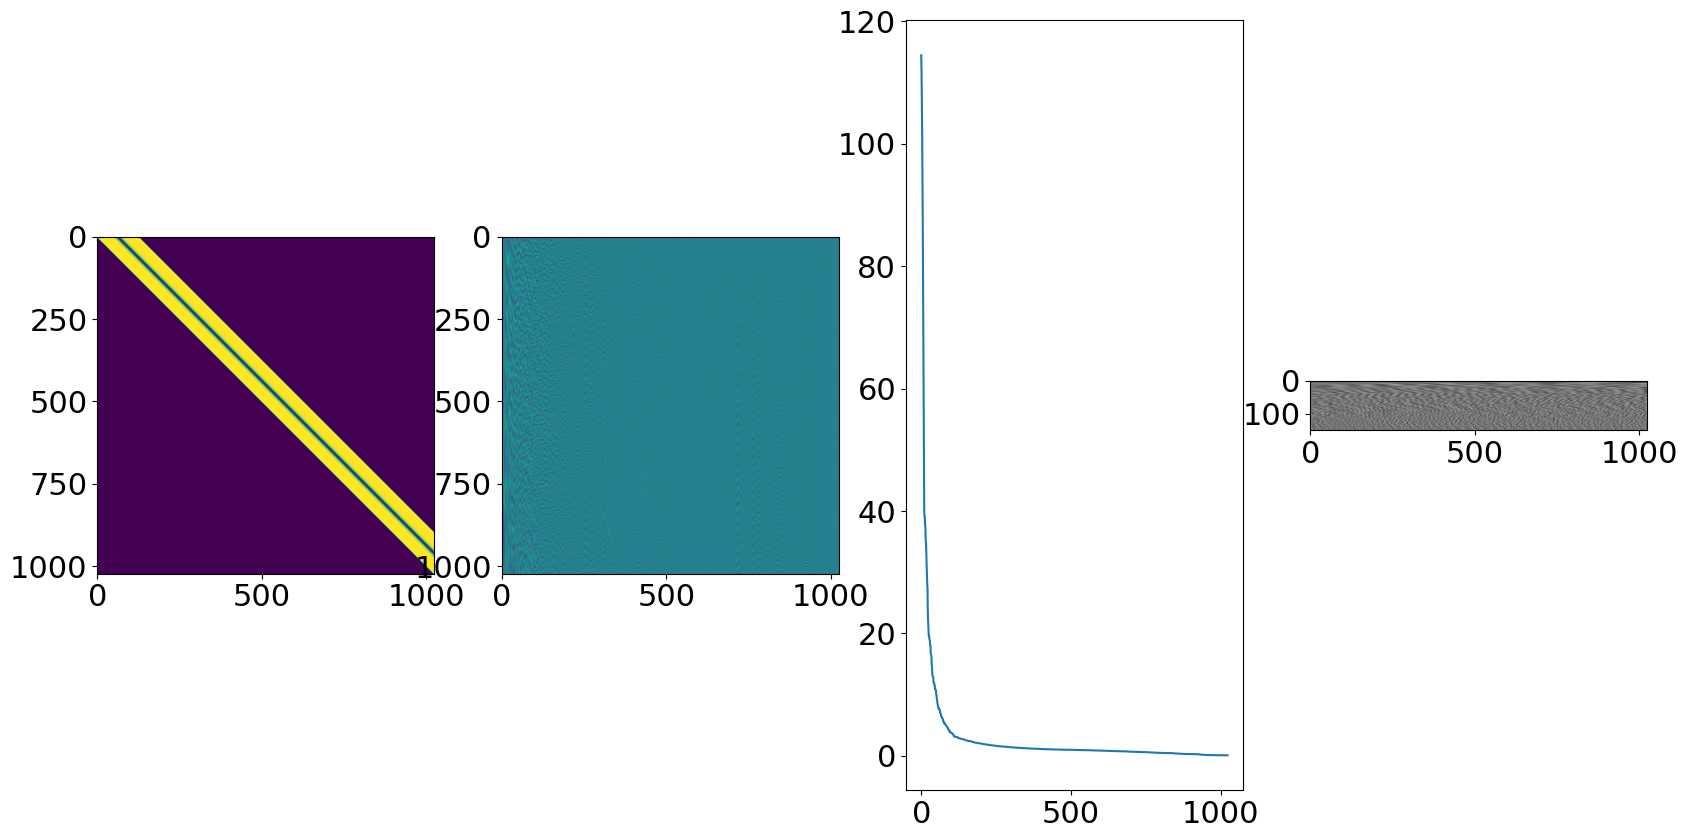

In [ ]:
from scipy.linalg import toeplitz
psf=(np.tanh(np.linspace(-10,10,128)))**2
N=1024
firstRow=np.concatenate((psf,np.zeros(N-len(psf))))
firstColumn=np.zeros(N)
firstColumn[0]=firstRow[0]
H=toeplitz(firstColumn,firstRow)
u, s, vh=np.linalg.svd(H)

plt.subplot(1, 4, 1)
plt.imshow(H)

plt.subplot(1, 4, 2)
plt.imshow(u)

plt.subplot(1, 4, 3)
plt.plot(s)

plt.subplot(1, 4, 4)
plt.imshow(vh[0:150,:], cmap='gray')

plt.show()

It can be found that the simple PSF function like [1,1,-1,1,1,1,-1,1], the plot of its singular values drops slower because each point at PSF has high rank. However, when it comes to tanh(x) or (tanh(x)**)2, the singular values plot drop faster because most effective data are concentrated in certain region which has higher rank compared to the rest.